In [1]:
import numpy as np
import pandas as pd

In [2]:
#Pandas Map Apply Aggregate
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
# 6개 row, 4개 col, columns에 ABCD라고 적으면 알아서 잘라서 하나씩 넣어줌
# 참고로 인덱스가 데이터 타입인 경우가 매우 많음
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-1.132840,-0.852237,0.951275,-1.117665
2013-01-02,0.387964,0.177900,-0.671486,-0.616347
2013-01-03,-1.593706,-1.289315,0.168513,0.105623
2013-01-04,-0.166949,0.625291,0.900994,1.399712
2013-01-05,0.042975,1.824707,0.026979,-0.501330
2013-01-06,1.769473,0.008678,0.402141,-0.690307


In [6]:
# 컬럼, 인덱스 다 빼고 값만 가져오기
df.to_numpy()

array([[-1.13284045, -0.85223651,  0.95127489, -1.11766484],
       [ 0.38796361,  0.17789997, -0.6714861 , -0.61634721],
       [-1.5937064 , -1.28931457,  0.16851289,  0.10562316],
       [-0.1669487 ,  0.62529145,  0.90099359,  1.39971206],
       [ 0.04297534,  1.82470721,  0.02697869, -0.50132967],
       [ 1.76947312,  0.00867772,  0.40214128, -0.69030749]])

In [7]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.115514,0.082504,0.296403,-0.236719
std,1.187808,1.104542,0.605198,0.893426
min,-1.593706,-1.289315,-0.671486,-1.117665
25%,-0.891368,-0.637008,0.062362,-0.671817
50%,-0.061987,0.093289,0.285327,-0.558838
75%,0.301717,0.513444,0.776281,-0.046115
max,1.769473,1.824707,0.951275,1.399712


In [14]:
# 행열 뒤집어 변형 => transpose, T 결과 동일
df.transpose()
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-1.132840,0.387964,-1.593706,-0.166949,0.042975,1.769473
B,-0.852237,0.177900,-1.289315,0.625291,1.824707,0.008678
C,0.951275,-0.671486,0.168513,0.900994,0.026979,0.402141
D,-1.117665,-0.616347,0.105623,1.399712,-0.501330,-0.690307


In [17]:
# 기본은 index축, axis=1은 행 기준축 즉, 열 순서가 바뀜
df.sort_index(ascending=False, axis=1)

,D,C,B,A
2013-01-01,-1.117665,0.951275,-0.852237,-1.132840
2013-01-02,-0.616347,-0.671486,0.177900,0.387964
2013-01-03,0.105623,0.168513,-1.289315,-1.593706
2013-01-04,1.399712,0.900994,0.625291,-0.166949
2013-01-05,-0.501330,0.026979,1.824707,0.042975
2013-01-06,-0.690307,0.402141,0.008678,1.769473


In [21]:
# C기준으로 정렬
df.sort_values(by='C')
df.sort_values(by='C').sort_values(by='A') # 같은 값 있으면 이런식도 가능

,A,B,C,D
2013-01-03,-1.593706,-1.289315,0.168513,0.105623
2013-01-01,-1.132840,-0.852237,0.951275,-1.117665
2013-01-04,-0.166949,0.625291,0.900994,1.399712
2013-01-05,0.042975,1.824707,0.026979,-0.501330
2013-01-02,0.387964,0.177900,-0.671486,-0.616347
2013-01-06,1.769473,0.008678,0.402141,-0.690307


In [29]:
# 판다스의 컬렉션 데이터는 주소..카피하지 않고 df2=df 한 채 iloc을 해버리면 
# df2값만 바꾸려했지만 df값도 바뀜. 따라서 copy로 내용만 복사해 사용하기!
df2 = df.copy()
df2.iloc[0,0] = 100
df2

,A,B,C,D
2013-01-01,100.000000,-0.852237,0.951275,-1.117665
2013-01-02,0.387964,0.177900,-0.671486,-0.616347
2013-01-03,-1.593706,-1.289315,0.168513,0.105623
2013-01-04,-0.166949,0.625291,0.900994,1.399712
2013-01-05,0.042975,1.824707,0.026979,-0.501330
2013-01-06,1.769473,0.008678,0.402141,-0.690307


## Series.Map

In [36]:
# map과 apply 차이 알기
# map은 컬렉션 데이터를 핸들링 함 (튜토리얼 Series에 있음). 하나의 컬럼 조작, 각 시리즈의 원소값 변화줄 떄,,

s = pd.Series(['cat','dog',np.nan, 'rabbit'])
df = pd.DataFrame({'pet':s})
df

,pet
0,cat
1,dog
2,NaN
3,rabbit


In [37]:
df['baby'] = df.pet.map({'cat':'kitton', 'dog':'puppy'})
df

,pet,baby
0,cat,kitton
1,dog,puppy
2,NaN,NaN
3,rabbit,NaN


In [40]:
df['i am'] = df.pet.map('I am a {}'.format, na_action='ignore')
df

,pet,baby,i am
0,cat,kitton,I am a cat
1,dog,puppy,I am a dog
2,NaN,NaN,NaN
3,rabbit,NaN,I am a rabbit


## DataFrame Apply 

In [45]:
# apply는 데이터 프레임. 여러개 컬럼 조작하고 싶을 때, 해당되는 컬럼 수정원할 때 사용
df = pd.DataFrame([[4,9]]*3, columns=['A','B'])
df

,A,B
0,4,9
1,4,9
2,4,9


In [46]:
df.apply(np.sqrt)

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


In [50]:
# all 컬럼  더한 값 (따로 설정 없으면 기본축 axis=0 ??)
df.apply(np.sum)

A    12
B    27
dtype: int64

In [54]:
# axis = 1
df['sum'] = df.apply(np.sum, axis=1)
df

,A,B,sum
0,4,9,26
1,4,9,26
2,4,9,26


## Apply MAP

In [58]:
# 브로드 캐스팅 문법과 유사
df = pd.DataFrame([[1, 2.12], [3.356, 4.567]])
df

,0,1
0,1.000,2.120
1,3.356,4.567


In [59]:
# 문자열 길이 출력 (다만 1.000이 문자열로 캐스팅할 떄 1.0이 되기 때문에 길이 3 나옴)
df.applymap(lambda x: len(str(x)))

,0,1
0,3,4
1,5,5


In [61]:
df.apply(np.cumsum)

,0,1
0,1.000,2.120
1,4.356,6.687


## Pandas Visulization

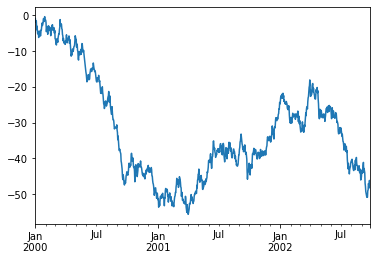

In [79]:
import matplotlib.pyplot as plt
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000',periods=1000))
ts = ts.cumsum()

# plot(), show()은 pandas 안에서 같은 메모리 주소. 
ts.plot()
plt.show()